In [30]:
#Import libraries
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
# Create SQLite connection
happiness_path = Path('Resources/HappinessIndexScore.sqlite')
engine = create_engine(f'sqlite:///{happiness_path}')
conn = engine.connect()

In [32]:
# Create df
happiness_df = pd.read_sql('SELECT * FROM final_output', con=engine)

happiness_df.head()

,country,region,ladder_score,logged_GPD_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,population_density,unemployment_rate,median_age,gini_coefficient,avg_temperature,lt_alcohol_per_capita
0,Finland,Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,16.60,7.16,43.2,27.7,3.24,8.23
1,Denmark,Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196,138.00,5.14,42.2,27.7,9.77,9.16
2,Iceland,Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668,3.50,3.56,37.8,26.1,2.11,7.72
3,Israel,Middle East,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,412.24,3.39,30.1,38.6,20.23,3.07
4,Netherlands,Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379,420.38,3.56,42.2,29.2,11.72,8.23


In [33]:
# Drop unnecesary columns
happiness_df.drop(['country', 'region'], inplace= True, axis= 1)

In [34]:
# Define features set
X = happiness_df.copy()

In [35]:
# Define target vector
y = happiness_df["ladder_score"].ravel()

C:\Users\roala\AppData\Local\Temp\ipykernel_26348\3483704943.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = happiness_df["ladder_score"].ravel()


In [49]:
#Splitting into Train and Test sets
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=48)

In [50]:
lm = LinearRegression()

In [51]:
# train the linear regression model
lm.fit(x_train, y_train)

LinearRegression()

## Evaluate our model

In [52]:
#Print the intercept
print(lm.intercept_)

-1.509903313490213e-14


In [62]:
#Print the coefficient. Positive coeff means value of independent variable increases. 
# A negative coeff suggests that as the independent variable increases, the dependent variable tend to decrease
#Source: https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/
print(lm.coef_)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

[ 1.00000000e+00 -9.27796895e-17 -5.36850696e-16  1.07513765e-16
 -8.46087601e-18  6.95694624e-16  2.13397219e-16 -2.71895269e-17
  8.01723728e-17  1.00194887e-17  7.62714898e-17  3.32938901e-16
 -4.39025896e-17]


,Coeff
ladder_score,1.000000e+00
logged_GPD_per_capita,-9.277969e-17
social_support,-5.368507e-16
healthy_life_expectancy,1.075138e-16
freedom_life_choices,-8.460876e-18
generosity,6.956946e-16
perceptions_corruption,2.133972e-16
population_density,-2.718953e-17
unemployment_rate,8.017237e-17
median_age,1.001949e-17


In [55]:
predictions = lm.predict(x_test)
predictions

array([4.941, 6.65 , 5.931, 6.144, 6.13 , 3.982, 5.211, 4.042, 5.36 ,
       2.392, 4.282, 4.876, 3.204, 4.432, 4.374, 5.33 , 1.859, 5.84 ,
       5.071, 7.395, 7.228, 4.487, 5.072, 4.198, 6.571, 6.3  , 5.703,
       4.605, 4.12 , 7.123, 6.259])

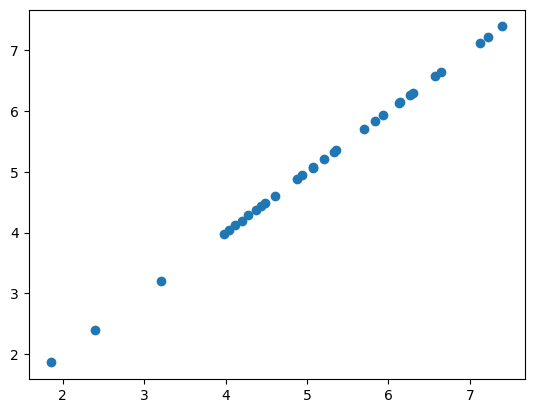

In [56]:
plt.scatter(y_test, predictions)

In [57]:
#Regression evaluation matrix 
metrics.mean_absolute_error(y_test, predictions)

4.906469495924079e-15

In [58]:
metrics.mean_squared_error(y_test, predictions)

7.104360438572052e-29

In [59]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

8.428736820290483e-15

In [ ]:
#Source: https://github.com/vivek2319/Linear-Regression-Prediction/blob/master/Linear_Regression_Scikit_learn.py